# HackerEarth Deep Learning #3
Challenge Page: https://www.hackerearth.com/challenge/competitive/deep-learning-3/  

fast.ai library setup: https://github.com/fastai/fastai

In [1]:
%matplotlib inline

In [3]:
import sys
import os
sys.path.append('/home/rupak/fastai/')
from fastai.conv_learner import *
from fastai.plots import *
from sklearn.metrics import f1_score
torch.cuda.set_device(0)

In [4]:
DATA_PATH = '/data/rupak/competitions/hacker_dl3_v2/data/'

In [6]:
label_csv = f'{DATA_PATH}meta-data/train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n, val_pct=0.1)

In [7]:
len(val_idxs)

1260

In [8]:
torch.backends.cudnn.enabled

True

In [9]:
def f1(preds, targs):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return f1_score(targs, (preds>0.5), average='micro')

In [10]:
def multilabel_accuracy(probs, labels):
    probs = probs > 0.5
    predicted = probs.cpu().numpy().astype(int)
    #print('labels')
    #print(labels)
    total = len(labels) * 85
    correct = (predicted == labels.cpu().numpy().astype(int)).sum()
    acc = 100 * correct / total
    #print('acc',acc)
    return acc
def multilabel_accuracy_numpy(probs, labels):
    probs = probs > 0.5
    predicted = probs.astype(int)
    total = len(labels) * 85
    correct = (predicted == labels.astype(int)).sum()
    acc = 100 * correct / total
    #print('acc',acc)
    return acc

In [11]:
def prepare_submission(test_preds, img_fnames, pred_filename):
    writer = open(pred_filename, 'w')
    header_line = 'Image_name,attrib_01,attrib_02,attrib_03,attrib_04,attrib_05,attrib_06,attrib_07,attrib_08,attrib_09,attrib_10,attrib_11,attrib_12,attrib_13,attrib_14,attrib_15,attrib_16,attrib_17,attrib_18,attrib_19,attrib_20,attrib_21,attrib_22,attrib_23,attrib_24,attrib_25,attrib_26,attrib_27,attrib_28,attrib_29,attrib_30,attrib_31,attrib_32,attrib_33,attrib_34,attrib_35,attrib_36,attrib_37,attrib_38,attrib_39,attrib_40,attrib_41,attrib_42,attrib_43,attrib_44,attrib_45,attrib_46,attrib_47,attrib_48,attrib_49,attrib_50,attrib_51,attrib_52,attrib_53,attrib_54,attrib_55,attrib_56,attrib_57,attrib_58,attrib_59,attrib_60,attrib_61,attrib_62,attrib_63,attrib_64,attrib_65,attrib_66,attrib_67,attrib_68,attrib_69,attrib_70,attrib_71,attrib_72,attrib_73,attrib_74,attrib_75,attrib_76,attrib_77,attrib_78,attrib_79,attrib_80,attrib_81,attrib_82,attrib_83,attrib_84,attrib_85'
    writer.write(header_line+'\n')
    sample_test_submission_file = f'{DATA_PATH}meta-data/test.csv'
    img_label_dict = dict()
    for img_path, prob in zip(img_fnames, test_preds):
        img_path = os.path.basename(img_path)
        #line = img_path+','+",".join(str(x) for x in prob)+'\n'
        img_label_dict[img_path]=",".join(str(x) for x in prob)+'\n'
        #writer.write(line)
    reader = open(sample_test_submission_file, 'r')
    read_lines = reader.readlines()
    for i, read_line in enumerate(read_lines[1:]):
        img_name=read_line.strip()
        img_labels = img_label_dict[img_name]
        writer.write(img_name+','+img_labels)
    writer.close()
    reader.close()

In [12]:
f_model = inception_4 
metrics=[f1, multilabel_accuracy]

In [13]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    return ImageClassifierData.from_csv(DATA_PATH, 'train_img', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test_img', bs=16)

In [14]:
data = get_data(512)

In [15]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics, ps=0.5)

epoch      trn_loss   val_loss   f1         multilabel_accuracy 
    0      0.371206   0.736758   0.860402   90.042017 



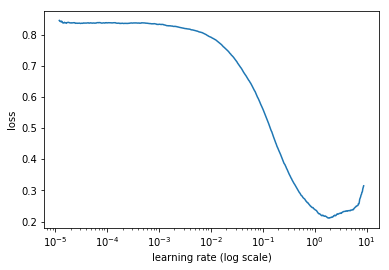

In [16]:
lrf=learn.lr_find()
learn.sched.plot()

## Train

In [17]:
lr = 0.3

In [18]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1         multilabel_accuracy 
    0      0.124197   0.06155    0.973024   98.042951 
    1      0.10213    0.043666   0.979394   98.503268         
    2      0.094157   0.04007    0.981001   98.620915         
    3      0.090086   0.037317   0.981843   98.681606         
    4      0.080092   0.033635   0.983541   98.802988         
    5      0.073293   0.031955   0.984793   98.893557         
    6      0.077613   0.031687   0.985097   98.918768         



[array([0.03169]), 0.9850972507071727, 98.91876750700277]

In [19]:
learn.unfreeze()
learn.bn_freeze(True)
lrs=np.array([1e-5,1e-4,1e-2])

In [20]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1         multilabel_accuracy 
    0      0.044472   0.029859   0.985318   98.933707 
    1      0.040596   0.028713   0.985392   98.938375         
    2      0.036332   0.028438   0.985567   98.951447         
    3      0.03417    0.027465   0.986184   98.995331         
    4      0.034871   0.027249   0.986256   99.000934         
    5      0.032147   0.026999   0.986282   99.002801         
    6      0.037767   0.026939   0.986259   99.000934         



[array([0.02694]), 0.9862590727761654, 99.00093370681607]

In [21]:
val = learn.predict()
probs = val > 0.5
labels = data.val_y
print('Normal validation accuracy', multilabel_accuracy_numpy(probs, labels))

Normal validation accuracy 99.00093370681606


In [22]:
log_preds,y = learn.TTA()
probs = np.mean(log_preds, 0) > 0.5
labels = y
print('TTA validation accuracy', multilabel_accuracy_numpy(probs, labels))

TTA validation accuracy 99.11297852474323    


In [23]:
lrs = 1e-3
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1         multilabel_accuracy 
    0      0.034093   0.026439   0.9863     99.003735 
    1      0.032119   0.025777   0.987167   99.066293         
    2      0.028159   0.024602   0.987842   99.11578          



[array([0.0246]), 0.9878416970001997, 99.1157796451914]

In [24]:
lrs = 1e-3
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1         multilabel_accuracy 
    0      0.02696    0.026317   0.987006   99.056022 
    1      0.023798   0.024637   0.988028   99.131653         
    2      0.017339   0.024023   0.988241   99.147526         



[array([0.02402]), 0.9882412176796819, 99.14752567693746]

In [25]:
lrs = 1e-3
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1         multilabel_accuracy 
    0      0.0217     0.023083   0.989227   99.218487 
    1      0.021678   0.025257   0.988402   99.159664         
    2      0.01817    0.023438   0.989256   99.220355         
    3      0.022394   0.023853   0.988973   99.199813         
    4      0.017177   0.026798   0.98892    99.194211         
    5      0.013649   0.023694   0.990569   99.315593         
    6      0.014039   0.023943   0.990325   99.297852         



[array([0.02394]), 0.9903246845991384, 99.29785247432305]

## Evaluate on Validation split and Prediction on Test Data

In [26]:
log_preds,y = learn.TTA()
probs = np.mean(log_preds, 0) > 0.5
labels = y
print('accuracy', multilabel_accuracy_numpy(probs, labels))

accuracy 99.3734827264239                    


In [27]:
log_preds,y = learn.TTA()
probs = np.mean(log_preds, 0) > 0.5
labels = y
print('accuracy', multilabel_accuracy_numpy(probs, labels))

accuracy 99.30532212885154                   


In [28]:
test_preds_tta, y_unk = learn.TTA(is_test=True)
test_preds = (np.mean(test_preds_tta, 0) > 0.5).astype(int)
prepare_submission(test_preds, data.test_ds.fnames, 'preds/model_submission.csv')

In [ ]:
learn.save('incepv4_512_drop50_run4_finetune1_v3_99.3_99.366')